In [63]:
"""
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([2, 3])

subax1 = plt.subplot(121)
#nx.draw(G, with_labels=True, font_weight='bold')
nx.draw_networkx(G)
#subax2 = plt.subplot(122)
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

G = nx.complete_graph(5)
nx.draw(G)

G = nx.path_graph(4)
shells = [[0], [1, 2, 3]]
nx.draw_shell(G,with_labels=True, font_weight='bold',nlist=shells,)
#nx.draw(G, with_labels=True, font_weight='bold')
"""

"\nimport networkx as nx\nimport matplotlib.pyplot as plt\n\nG = nx.Graph()\nG.add_nodes_from([2, 3])\n\nsubax1 = plt.subplot(121)\n#nx.draw(G, with_labels=True, font_weight='bold')\nnx.draw_networkx(G)\n#subax2 = plt.subplot(122)\n#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')\n\nG = nx.complete_graph(5)\nnx.draw(G)\n\nG = nx.path_graph(4)\nshells = [[0], [1, 2, 3]]\nnx.draw_shell(G,with_labels=True, font_weight='bold',nlist=shells,)\n#nx.draw(G, with_labels=True, font_weight='bold')\n"

# Draw graph of measurements

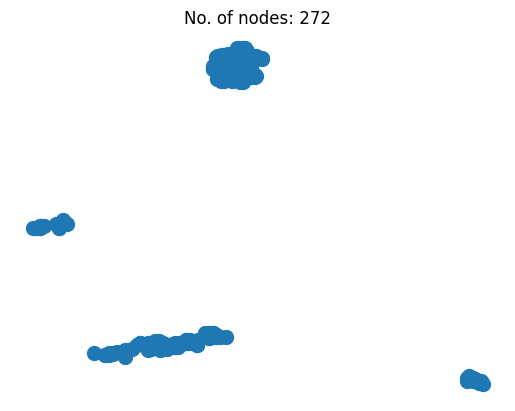

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

data_path = r"data/measurements.csv"
data = pd.read_csv(data_path)

G = nx.Graph()

for i, row in data.iterrows():
    G.add_node(i, pos=(row["X"], row["Y"]))

plt.title(f"No. of nodes: {G.number_of_nodes()}")
nx.draw(G, pos=nx.get_node_attributes(G,"pos"), with_labels=False, node_size=100, font_weight='bold')
plt.show()

# k-NN Function

In [ ]:
# The following code is for the KNN Clustering from Scratch
# Created by - ANALYTICS VIDHYA

# Importing libraries
import pandas as pd
import numpy as np
import math
import operator


#### Start of STEP 1
# Importing data 
data = pd.read_csv('iris.csv')
#### End of STEP 1

print(data.head(5)) 

# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Defining our KNN model
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
 
    length = testInstance.shape[1]
    
    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1
 
    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5


testSet = [[7.2, 3.6, 5.1, 2.5]]
test = pd.DataFrame(testSet)

#### Start of STEP 2
# Setting number of neighbors = 1


print('\n\nWith 1 Nearest Neighbour \n\n')
k = 1
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted Class of the datapoint = ', result)

# Nearest neighbor
print('\nNearest Neighbour of the datapoints = ',neigh)


print('\n\nWith 3 Nearest Neighbours\n\n')
# Setting number of neighbors = 3 
k = 3 
# Running KNN model 
result,neigh = knn(data, test, k) 

# Predicted class 
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)

print('\n\nWith 5 Nearest Neighbours\n\n')
# Setting number of neighbors = 3 
k = 5
# Running KNN model 
result,neigh = knn(data, test, k) 

# Predicted class 
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)